# Explore Classification Algorithms

## 1. Load Modules and Data

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
%reload_kedro

2020-11-15 00:44:17,866 - kedro.config.config - INFO - Config from path `C:\Users\steph\Documents\Hack4Good\helvetas\conf\local` will override the following existing top-level config keys: canton_population_data, enhanced_data, features_data, female_names, helvetas_data, income_data, labeled_data, male_names, model_input_data, municipality_number_data, municipality_population_data, preprocessed_canton_populations, preprocessed_helvetas, preprocessed_incomes, preprocessed_municipality_numbers, preprocessed_municipality_populations, preprocessed_names, preprocessed_wealths, unlabeled_data, wealth_data
2020-11-15 00:44:17,882 - root - INFO - ** Kedro project Helvetas Hack4Good
2020-11-15 00:44:17,882 - root - INFO - Defined global variable `context` and `catalog`
Traceback (most recent call last):
  File "C:\Users\steph\miniconda3\lib\site-packages\kedro\framework\cli\cli.py", line 682, in load_entry_points
    entry_point_commands.append(entry_point.load())
  File "C:\Users\steph\minicon

In [4]:
data = catalog.load("train_data")
test_data = catalog.load("test_data")

2020-11-15 00:44:17,921 - kedro.io.data_catalog - INFO - Loading data from `train_data` (PickleDataSet)...
2020-11-15 00:44:17,982 - kedro.io.data_catalog - INFO - Loading data from `test_data` (PickleDataSet)...


## Generation Classification

In [7]:
def generation_classification(gebjah):
    """
    Generates generation label from birth years
    
    Generation names and time frames are taken from the classification specified under
    https://swissfundraising.org/generationenwechsel-als-herausforderung-fuers-fundraising/
    These match with the ones specified in the Helvetas project outline.
    """
    if gebjah <= 1951:
        return "reconstructor"
    elif gebjah > 1951 and gebjah <= 1966:
        return "boomer"
    elif gebjah > 1966 and gebjah <=1981:
        return "genx"
    elif gebjah > 1981 and gebjah <= 1996:
        return "millenials"
    elif gebjah > 1996 and gebjah <= 2011:
        return "ibrains"
    else:
        return "smarties"
        
    return label

C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Add generation to data sets
data["generation"] = data.apply(lambda x: generation_classification(x["gebjah"]), axis = 1)
test_data["generation"] = test_data.apply(lambda x: generation_classification(x["gebjah"]), axis = 1)

In [66]:
# Number of entries per generation
print("Generation distribution in training data / %:")
display(data.generation.value_counts(normalize=True)*100.)
print("Generation distribution in test data / %:")
display(test_data.generation.value_counts(normalize=True)*100.)

Generation distribution in training data / %:


millenials       40.421752
genx             27.158887
boomer           16.470857
reconstructor     9.449858
ibrains           6.470505
smarties          0.028140
Name: generation, dtype: float64

Generation distribution in test data / %:


millenials       40.064839
genx             27.174984
boomer           16.275443
reconstructor     9.450919
ibrains           6.959947
smarties          0.073867
Name: generation, dtype: float64

In [68]:
# Split in x and y
y = data["generation"]
x = data.drop(["gebjah", "label_age_at_acquisition", "generation"], axis = 1)
#x = data.drop(["gebjah", "generation"], axis = 1) # Dummy test
y_test = test_data["generation"]
x_test = test_data.drop(["gebjah", "label_age_at_acquisition", "generation"], axis = 1)
#x_test = test_data.drop(["gebjah", "generation"], axis = 1) # Dummy test

## Accuracy Measurement Functionality

In [89]:
def get_accuracy(fitted_model, prediction_x, true_y, predicted_y):
    """
    Gets the prediction accuracy and plots the confusion matrix
    """
    # Get the accuracy
    accuracy = accuracy_score(true_y, predicted_y)
    print("Accuracy: {:.1f} %".format(accuracy*100.))
    # Plot the confusion matrix
    print("Confusion matrix:")
    plot_confusion_matrix(fitted_model, prediction_x, true_y, xticks_rotation='vertical', cmap=plt.cm.Blues)



C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Random Forest Classification

#### Parameter dependent timing and accuracy:
| # Trees | Criterion | Maximum Depth | Accuracy / % | Training Time /s |
|---------|:---------:|:-------------:|-------------:|-----------------:|
|  100    | gini      | 2             |  49.4        |   1.9            |
|  100    | entropy   | 2             |  45.7        |   2.1            |
|  150    | gini      | 2             |  49.3        |   2.8            |
|  100    | gini      | 20            |  61.2        |   12.4           |
|  100    | gini      | 40            |  61.4        |   14.2           |
|  100    | entropy   | 40            |  61.3        |   18.8           |
|  150    | gini      | 40            |  61.7        |   21.7           |
|  100    | gini      | 50            |  61.5        |   15.6           |

In [136]:
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth=50,  random_state=42)
# Train
rf_model.fit(x, y)
print("Training time: {:.1f} s".format(time.time()-start_time))

C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training time: 15.6 s


C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 61.5 %
Confusion matrix:


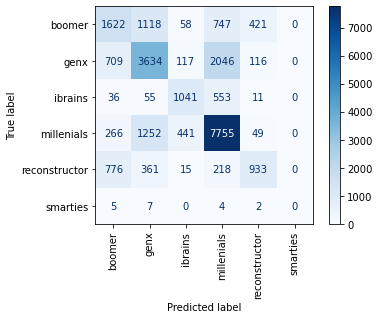

In [137]:
# Predict
rf_y_test_predicted = rf_model.predict(x_test)

# Show performance
get_accuracy(rf_model, x_test, y_test, rf_y_test_predicted)


## Logistic Regression

#### Parameter dependent timing and accuracy:
 
| Penalty | Dual      | Class Weight | Solver      | Accuracy / % | Training Time /s | # Iterations |
|---------|:---------:|:------------:|:-----------:|-------------:| ----------------:| ------------:|
|  l2     | False     | None         |  lbfgs      |     42.2     | 455.6            | 11643        |
|  l2     | False     | balanced     |  lbfgs      |     18.7     | 304.3            | 7586         |
|  l2     | False     | None         |  saga       |      41.8    | 826.2            | 6803         |


In [134]:
start_time = time.time()
lr_model = LogisticRegression(max_iter=50000, solver = "saga", random_state=42)
# Train
lr_model.fit(x, y)
print("Training time: {:.1f} s".format(time.time()-start_time))
print("Number of iterations: {:d}".format(lr_model.n_iter_[0]))

Training time: 826.2 s
Number of iterations: 6803


C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 41.8 %
Confusion matrix:


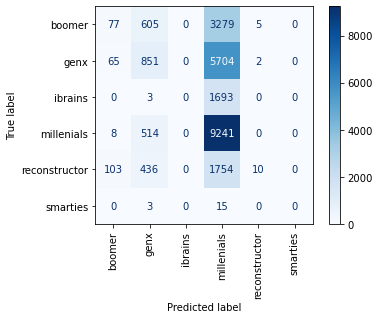

In [135]:
# Predict
lr_y_test_predicted = lr_model.predict(x_test)

# Show performance
get_accuracy(lr_model, x_test, y_test, lr_y_test_predicted)

## Nearest Neighbors

#### Parameter dependent timing and accuracy:

| # Neighbors k | Accuracy / % | Training Time /s | 
|---------------| ------------:| ----------------:|
|  5            | 39.0         | 1.6              |  
|  10           | 39.7         | 1.5              | 
|  50           | 41.4         | 1.5              | 
|  230          | 40.9         | 1.5              | 


In [154]:
start_time = time.time()
kn_model = KNeighborsClassifier(n_neighbors=100)
# Train
kn_model.fit(x, y)
print("Training time: {:.1f} s".format(time.time()-start_time))

C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training time: 1.5 s


C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 41.5 %
Confusion matrix:


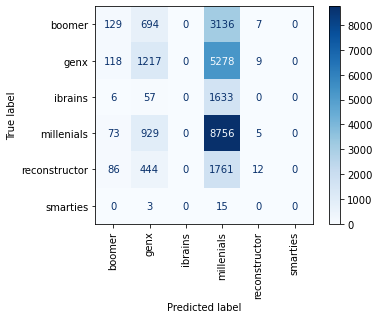

In [155]:
# Predict
kn_y_test_predicted = kn_model.predict(x_test)

# Show performance
get_accuracy(kn_model, x_test, y_test, kn_y_test_predicted)

## Naive Bayes (Gaussian)

In [131]:
start_time = time.time()
nb_model = GaussianNB()
# Train
nb_model.fit(x, y)
print("Training time: {:.1f} s".format(time.time()-start_time))

C:\Users\steph\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training time: 0.3 s


Accuracy: 29.9 %
Confusion matrix:


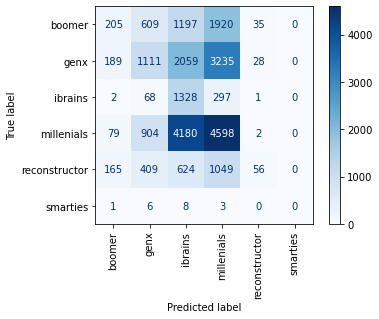

In [140]:
# Predict
nb_y_test_predicted = nb_model.predict(x_test)

# Show performance
get_accuracy(nb_model, x_test, y_test, nb_y_test_predicted)